In [12]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
tl=yf.download("TRY=X","1967-01-01","2022-09-17")

[*********************100%***********************]  1 of 1 completed


In [15]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.344,1.344,0
2005-01-04,1.3368,1.3510,1.3368,1.351,1.351,0
2005-01-05,1.3545,1.3865,1.3545,1.374,1.374,0


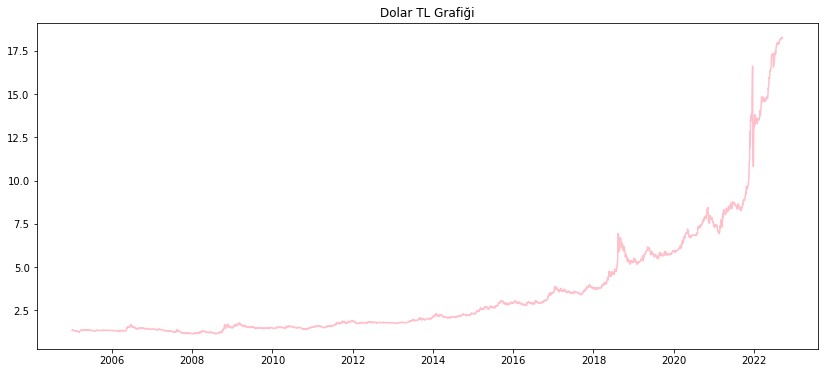

In [17]:
plt.figure(figsize=(14,6))
plt.plot(tl.index,tl['Close'],color="pink")
plt.title("Dolar TL Grafiği")
plt.show()

In [18]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.344,1.344,0
2005-01-04,1.3368,1.3510,1.3368,1.351,1.351,0
2005-01-05,1.3545,1.3865,1.3545,1.374,1.374,0


In [19]:
tl['dun']=tl['Close'].shift(1)

In [20]:
tl.head()

,Open,High,Low,Close,Adj Close,Volume,dun
Date,,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.3440,1.3440,0,NaN
2005-01-04,1.3368,1.3510,1.3368,1.3510,1.3510,0,1.3440
2005-01-05,1.3545,1.3865,1.3545,1.3740,1.3740,0,1.3510
2005-01-06,1.3780,1.4058,1.3780,1.3925,1.3925,0,1.3740
2005-01-07,1.3870,1.3940,1.3615,1.3940,1.3940,0,1.3925


In [21]:
tl=tl.dropna()
#tl=tl.iloc[1:]

In [22]:
tl.head()

,Open,High,Low,Close,Adj Close,Volume,dun
Date,,,,,,,
2005-01-04,1.3368,1.3510,1.3368,1.3510,1.3510,0,1.3440
2005-01-05,1.3545,1.3865,1.3545,1.3740,1.3740,0,1.3510
2005-01-06,1.3780,1.4058,1.3780,1.3925,1.3925,0,1.3740
2005-01-07,1.3870,1.3940,1.3615,1.3940,1.3940,0,1.3925
2005-01-10,1.3985,1.4055,1.3750,1.3920,1.3920,0,1.3940


In [23]:
tl=tl[["Close","dun","Volume"]]

In [24]:
tl.head()

,Close,dun,Volume
Date,,,
2005-01-04,1.3510,1.3440,0
2005-01-05,1.3740,1.3510,0
2005-01-06,1.3925,1.3740,0
2005-01-07,1.3940,1.3925,0
2005-01-10,1.3920,1.3940,0


In [25]:
tl['oran']=(tl['Close']-tl['dun'])/tl['Close']*100

In [26]:
tl.head()

,Close,dun,Volume,oran
Date,,,,
2005-01-04,1.3510,1.3440,0,0.518132
2005-01-05,1.3740,1.3510,0,1.673945
2005-01-06,1.3925,1.3740,0,1.328552
2005-01-07,1.3940,1.3925,0,0.107605
2005-01-10,1.3920,1.3940,0,-0.143685


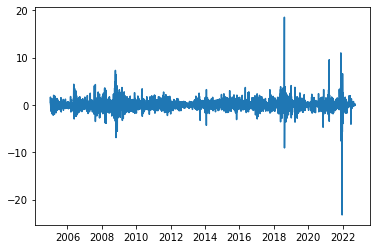

In [27]:
plt.plot(tl.index,tl['oran'])
plt.show()

In [28]:
tlyil=tl.groupby(tl.index.year).mean()
tlyilmax=tl.groupby(tl.index.year).max()

In [29]:
tlyil.head(3)

,Close,dun,Volume,oran
Date,,,,
2005,1.343615,1.343592,0.0,-0.000398
2006,1.431626,1.431395,0.0,0.012164
2007,1.300536,1.301495,0.0,-0.079380


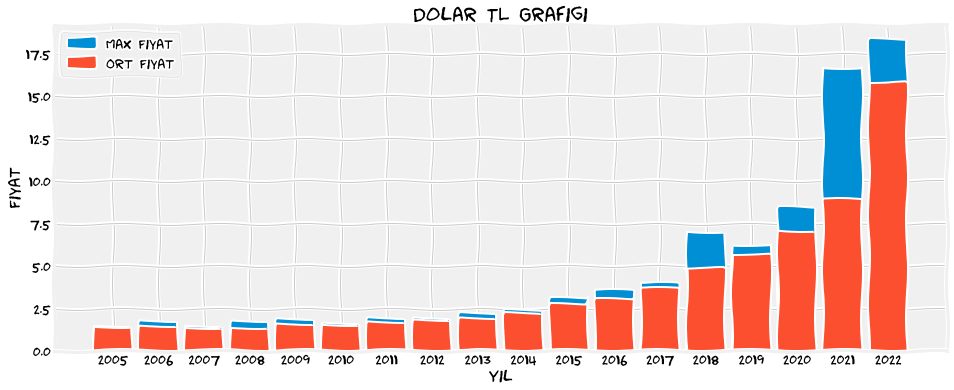

In [30]:
with plt.xkcd():
    plt.figure(figsize=(16,6))
    plt.style.use("fivethirtyeight")
    plt.title("Dolar TL Grafigi")
    plt.xlabel("Yil")
    plt.ylabel("Fiyat")
    plt.bar(tlyil.index.astype(str),tlyilmax['Close'],label="Max Fiyat")
    plt.bar(tlyil.index.astype(str),tlyil['Close'],label="Ort Fiyat")
    plt.legend()
    plt.grid(True)
    plt.savefig("grafik.png")
    plt.show()

In [31]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [32]:
import plotly.express as px

In [33]:
a=px.line(tl,tl.index,tl['Close'])
a.show()